In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
plt.style.use('classic')
sns.set()
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [88]:
df = pd.read_csv('analisedechurn.csv')
df.drop(df.columns[[-1,-2]], axis=1, inplace=True) # Drop 2 last columns
print(df.shape)
df.info()

(10127, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64

In [89]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [90]:
df[['Income_Category']]

,Income_Category
0,$60K - $80K
1,Less than $40K
2,$80K - $120K
3,Less than $40K
4,$60K - $80K
...,...
10122,$40K - $60K
10123,$40K - $60K
10124,Less than $40K
10125,$40K - $60K


Index(['Existing Customer', 'Attrited Customer'], dtype='object', name='Attrition_Flag')


<Axes: xlabel='Education_Level', ylabel='count'>

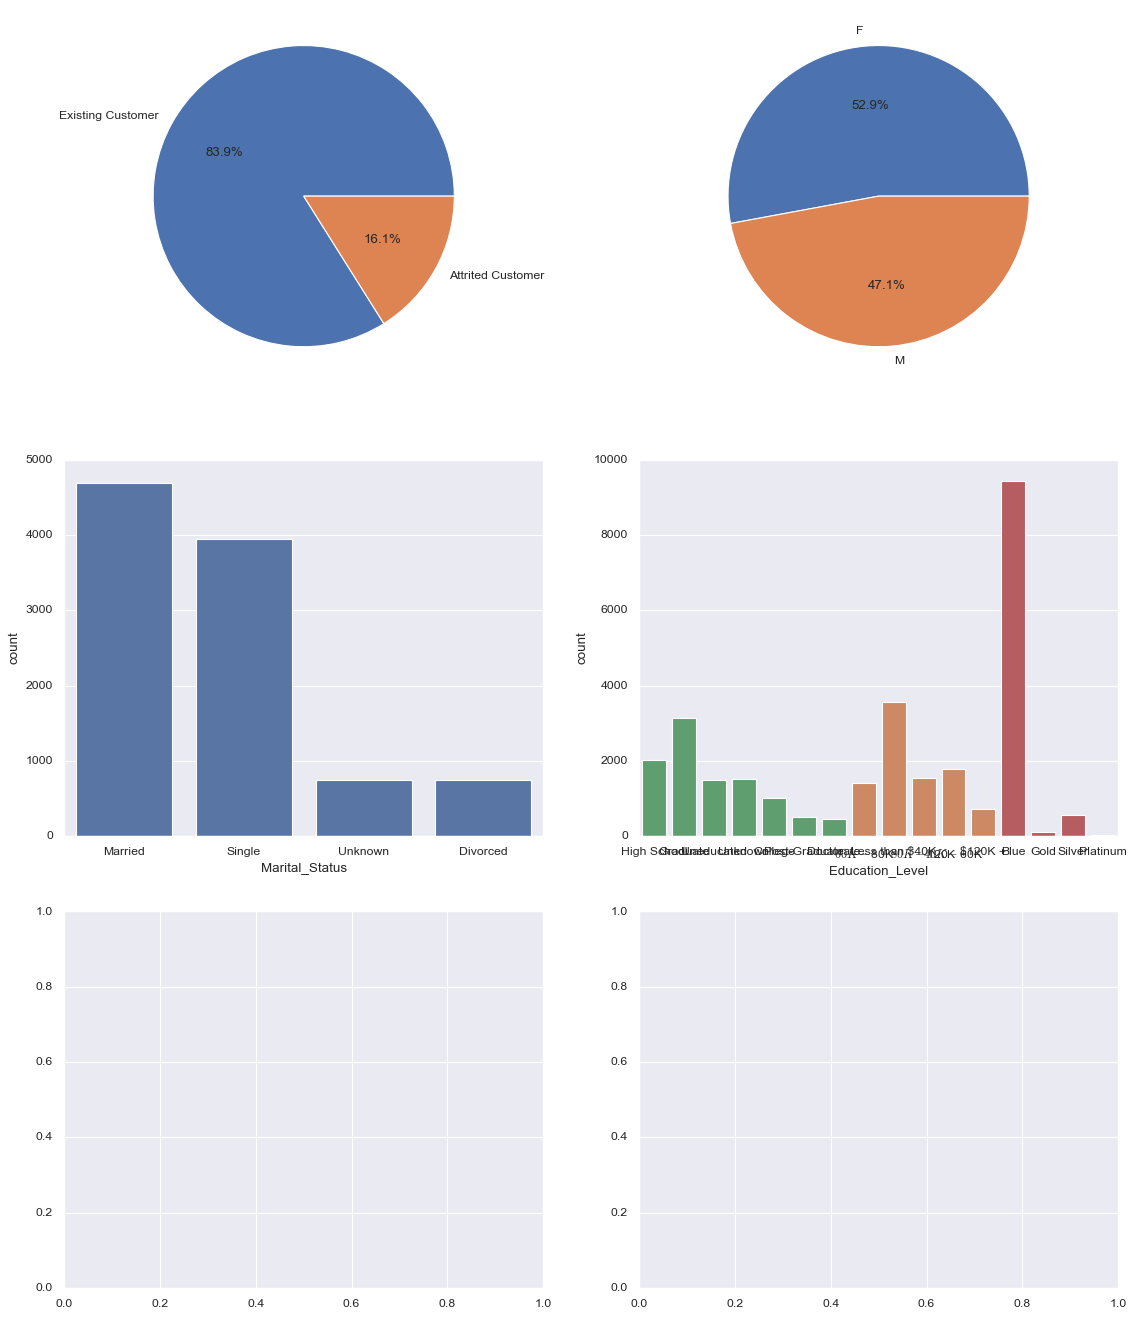

In [91]:
fig = plt.figure(figsize=(17,20))

#Gerar marcadores de posicao dos plots
spec = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)

ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[1,0])
ax4 = fig.add_subplot(spec[1,1])
ax5 = fig.add_subplot(spec[2,0])
ax6 = fig.add_subplot(spec[2,1])

labels = df['Attrition_Flag'].value_counts().keys()
print(labels)
ax1.pie(df['Attrition_Flag'].value_counts(), labels=labels, autopct='%.1f%%')
labels= df['Gender'].value_counts().keys()

ax2.pie(df['Gender'].value_counts(), labels=labels, autopct='%.1f%%')

sns.countplot(ax=ax3, x=df['Marital_Status'])
sns.countplot(ax=ax4, x=df['Education_Level'])
sns.countplot(ax=ax4, x=df['Income_Category'])
sns.countplot(ax=ax4, x=df['Education_Level'])
sns.countplot(ax=ax4, x=df['Card_Category'])

In [92]:
df.select_dtypes(include='float64').describe()

,Credit_Limit,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,8631.953698,7469.139637,0.759941,0.712222,0.274894
std,9088.776650,9090.685324,0.219207,0.238086,0.275691
min,1438.300000,3.000000,0.000000,0.000000,0.000000
25%,2555.000000,1324.500000,0.631000,0.582000,0.023000
50%,4549.000000,3474.000000,0.736000,0.702000,0.176000
75%,11067.500000,9859.000000,0.859000,0.818000,0.503000
max,34516.000000,34516.000000,3.397000,3.714000,0.999000


In [93]:
df.groupby('Attrition_Flag')[df.select_dtypes(include='float64').columns].describe().T

Attrition_Flag               Attrited Customer  Existing Customer
Credit_Limit          count        1627.000000        8500.000000
                      mean         8136.039459        8726.877518
                      std          9095.334105        9084.969807
                      min          1438.300000        1438.300000
                      25%          2114.000000        2602.000000
                      50%          4178.000000        4643.500000
                      75%          9933.500000       11252.750000
                      max         34516.000000       34516.000000
Avg_Open_To_Buy       count        1627.000000        8500.000000
                      mean         7463.216472        7470.273400
                      std          9109.208129        9087.671862
                      min             3.000000          15.000000
                      25%          1587.000000        1184.500000
                      50%          3488.000000        3469.500000
                      75%          9257.500000        9978.250000
                      max         34516.000000       34516.000000
Total_Amt_Chng_Q4_Q1  count        1627.000000        8500.000000
                      mean            0.694277           0.772510
                      std             0.214924           0.217783
                      min             0.000000           0.256000
                      25%             0.544500           0.643000
                      50%             0.701000           0.743000
                      75%             0.856000           0.860000
                      max             1.492000           3.397000
Total_Ct_Chng_Q4_Q1   count        1627.000000        8500.000000
                      mean            0.554386           0.742434
                      std             0.226854           0.228054
                      min             0.000000           0.028000
                      25%             0.400000           0.617000
                      50%             0.531000           0.721000
                      75%             0.692000           0.833000
                      max             2.500000           3.714000
Avg_Utilization_Ratio count        1627.000000        8500.000000
                      mean            0.162475           0.296412
                      std             0.264458           0.272568
                      min             0.000000           0.000000
                      25%             0.000000           0.055000
                      50%             0.000000           0.211000
                      75%             0.231000           0.529250
                      max             0.999000           0.994000

<Axes: title={'center': 'Avg_Utilization_Ratio'}, xlabel='[Attrition_Flag]'>

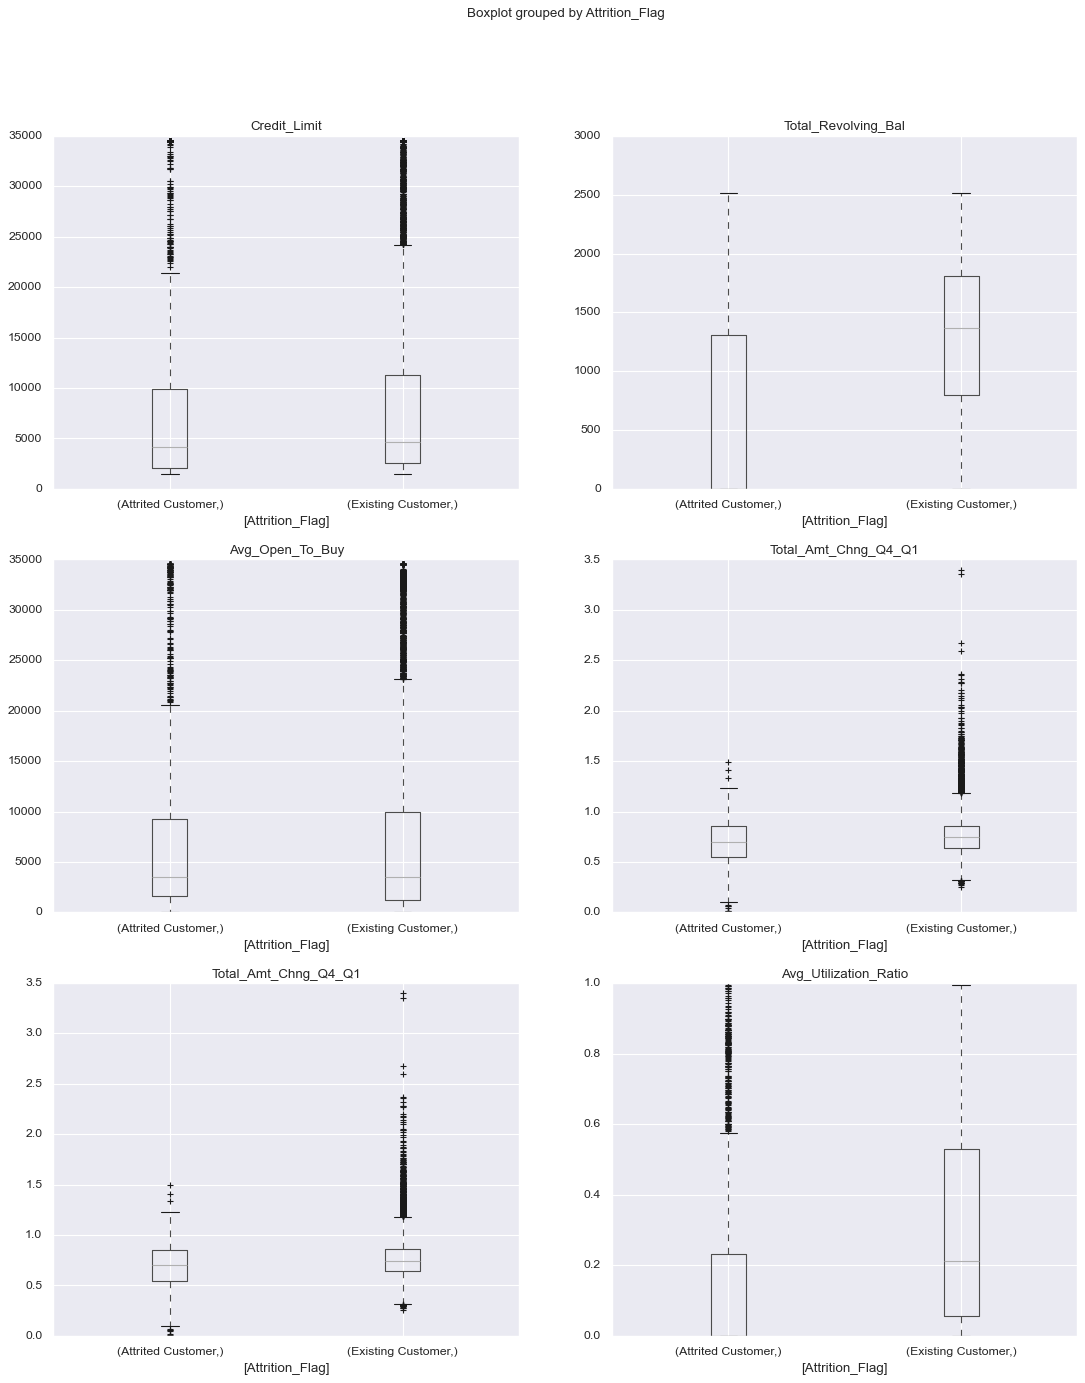

In [94]:
fig = plt.figure(figsize=(16, 20))

spec = gridspec.GridSpec(ncols = 2, nrows = 3, figure= fig)

ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[1,0])
ax4 = fig.add_subplot(spec[1,1])
ax5 = fig.add_subplot(spec[2,0])
ax6 = fig.add_subplot(spec[2,1])

df.boxplot(column=['Credit_Limit'], by=['Attrition_Flag'], ax=ax1)
df.boxplot(column=['Total_Revolving_Bal'], by=['Attrition_Flag'], ax=ax2)
df.boxplot(column=['Avg_Open_To_Buy'], by=['Attrition_Flag'], ax=ax3)

df.boxplot(column=['Total_Amt_Chng_Q4_Q1'], by=['Attrition_Flag'], ax=ax4)
df.boxplot(column=['Total_Amt_Chng_Q4_Q1'], by=['Attrition_Flag'], ax=ax5)
df.boxplot(column=['Avg_Utilization_Ratio'], by=['Attrition_Flag'], ax=ax6)

<Axes: xlabel='Card_Category', ylabel='count'>

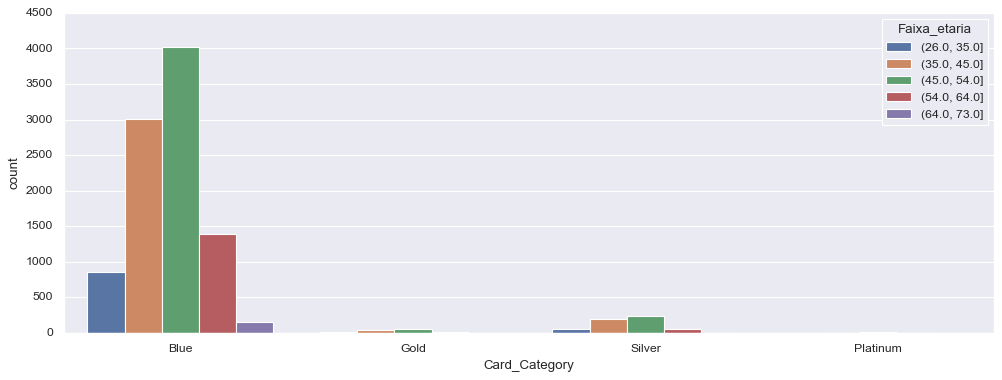

In [95]:
df['Faixa_etaria'] = pd.cut(df['Customer_Age'], bins=5, precision=0)

plt.figure(figsize=(15,5))
sns.countplot(x='Card_Category', hue='Faixa_etaria', data=df)

In [96]:
df.replace({'unknown': np.nan}, inplace=True)

df.dropna(inplace=True)

#df.drop(['CLIENTNUM'], axis=1, inplace=True)

In [97]:
df['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1})
df['Gender'].replace({'M': 0, 'F':1})

df2 = pd.concat([df['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer':1}),
                 df['Gender'].replace({'M': 0, 'F': 1}),
    pd.get_dummies(df['Marital_Status']),
    pd.get_dummies(df['Education_Level']),
    pd.get_dummies(df['Income_Category']),
    pd.get_dummies(df['Card_Category']),
    df.select_dtypes(include=['float64', 'int64'])], axis=1)

df2.drop(['Uneducated', 'Divorced', '$120K +', 'Platinum'], axis=1, inplace=True)

C:\Users\50749314877\AppData\Local\Temp\ipykernel_10548\342847121.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1})
C:\Users\50749314877\AppData\Local\Temp\ipykernel_10548\342847121.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace({'M': 0, 'F':1})
C:\Users\50749314877\AppData\Local\Temp\ipykernel_10548\342847121.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To reta

In [103]:
x = df2.drop(['Attrition_Flag', 'Credit_Limit'], axis=1)
y = df2['Attrition_Flag'] # Attrition flag é o que quer ser previsto

# Dividir o X e Y em dois grupos, um de treino e um de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [104]:
model1 = RandomForestClassifier(random_state=0)
model1.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

<Axes: >

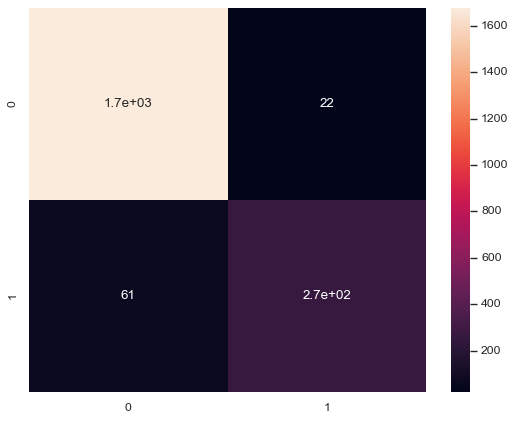

In [105]:
ypreview = model1.predict(x_test)

cf_mat = confusion_matrix(y_test, ypreview)

sns.heatmap(cf_mat, annot=True)

<Axes: xlabel='Total_Trans_Amt', ylabel='Churnprob'>

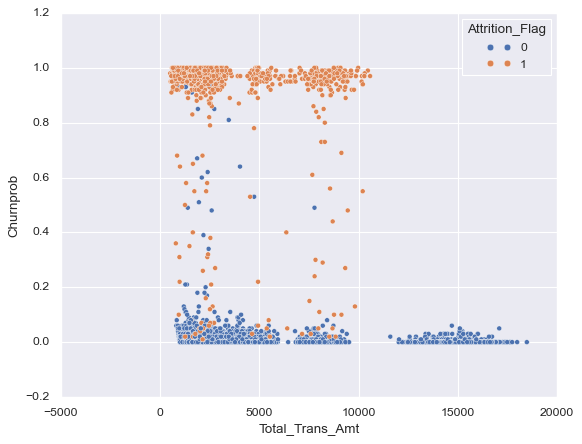

In [106]:
probtotal = model1.predict_proba(x)
df2['Churnprob'] = probtotal[:,1]

sns.scatterplot(x='Total_Trans_Amt', y='Churnprob', hue='Attrition_Flag', data=df2)